# PCA and LDA on Hearing Data

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import KernelPCA

import seaborn as sns
import numpy as np

In [33]:
# Load the data
file_path = "../../data/nhanes_1520_age.csv"
data = pd.read_csv(file_path)
data = data[data['RIDAGEYR'] >= 60]
data.set_index('SEQN', inplace=True)
print(data.shape)
data.head()

(2410, 15)


,AUXU500R,AUXU1K1R,AUXU2KR,AUXU3KR,AUXU4KR,AUXU6KR,AUXU8KR,AUXU500L,AUXU1K1L,AUXU2KL,AUXU3KL,AUXU4KL,AUXU6KL,AUXU8KL,RIDAGEYR
SEQN,,,,,,,,,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0,5.0,5.0,5.0,35.0,50.0,50.0,55.0,62
83754,10.0,20.0,10.0,10.0,20.0,25.0,40.0,10.0,15.0,5.0,10.0,15.0,30.0,25.0,67
83755,10.0,10.0,15.0,35.0,30.0,35.0,40.0,5.0,5.0,10.0,25.0,15.0,15.0,25.0,67
83775,55.0,60.0,50.0,50.0,50.0,70.0,75.0,65.0,60.0,50.0,60.0,65.0,75.0,65.0,69
83785,20.0,35.0,30.0,35.0,30.0,35.0,80.0,15.0,25.0,25.0,40.0,55.0,50.0,60.0,60


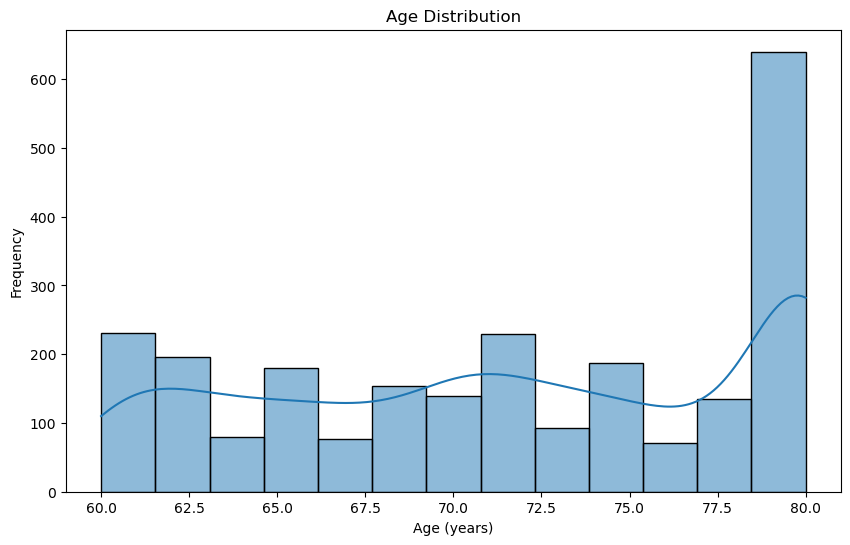

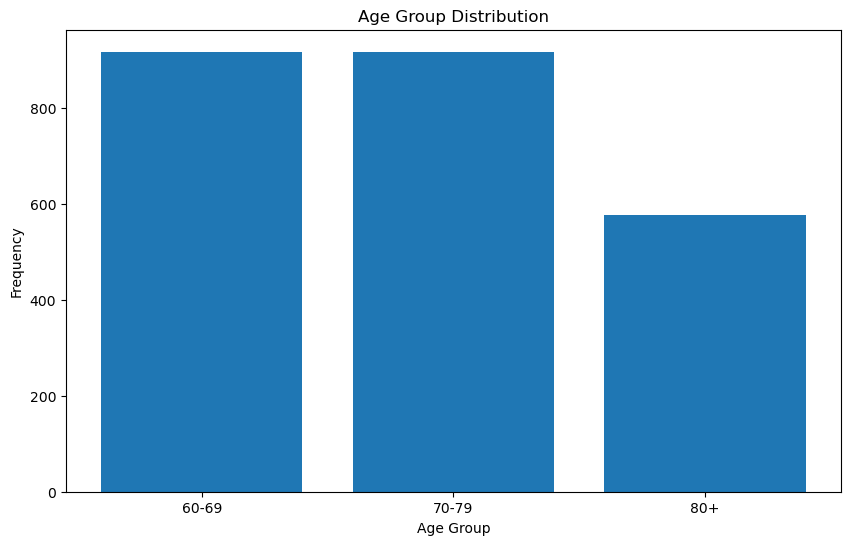

In [34]:
# Check the age distribution in the column 'RIDAGEYR'
plt.figure(figsize=(10, 6))
sns.histplot(data['RIDAGEYR'], kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.show()

# Group age into 3 categories
data['age_group'] = pd.cut(data['RIDAGEYR'], bins=[60, 70, 80, 100], labels=['60-69', '70-79', '80+'], right = False)
data['age_group'].value_counts()

# Visualize the 3 categories
plt.figure(figsize=(10, 6))
plt.bar(data['age_group'].value_counts().index, data['age_group'].value_counts().values)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

In [35]:
# Select the columns for right ear measurements

right_ear_columns = ['AUXU500R', 'AUXU1K1R', 'AUXU2KR', 'AUXU3KR', 'AUXU4KR', 'AUXU6KR', 'AUXU8KR']
right_ear_data = data[right_ear_columns]
right_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Select the columns for left ear measurements

left_ear_columns = ['AUXU500L', 'AUXU1K1L', 'AUXU2KL', 'AUXU3KL', 'AUXU4KL', 'AUXU6KL', 'AUXU8KL']
left_ear_data = data[left_ear_columns]
left_ear_data.columns = ['500 Hz', '1 kHz', '2 kHz', '3 kHz', '4 kHz', '6 kHz', '8 kHz']

# Concatenate the right and left ear data

ear_data = pd.concat([right_ear_data, left_ear_data], axis = 0)

# Change the column names to be more descriptive

ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83754,10.0,20.0,10.0,10.0,20.0,25.0,40.0
83755,10.0,10.0,15.0,35.0,30.0,35.0,40.0
83775,55.0,60.0,50.0,50.0,50.0,70.0,75.0
83785,20.0,35.0,30.0,35.0,30.0,35.0,80.0
...,...,...,...,...,...,...,...
124756,10.0,15.0,10.0,25.0,25.0,25.0,40.0
124784,45.0,50.0,50.0,50.0,50.0,45.0,80.0
124799,20.0,40.0,45.0,45.0,60.0,85.0,666.0


In [36]:
# Process missing values
cleaned_ear_data = ear_data.replace({888: np.nan, 666: np.nan, '.': np.nan}, inplace=False)
cleaned_ear_data = cleaned_ear_data.dropna(inplace=False)

# cleaned_ear_data.reset_index(drop=True, inplace=True)
cleaned_ear_data

,500 Hz,1 kHz,2 kHz,3 kHz,4 kHz,6 kHz,8 kHz
SEQN,,,,,,,
83732,10.0,5.0,5.0,20.0,30.0,25.0,50.0
83754,10.0,20.0,10.0,10.0,20.0,25.0,40.0
83755,10.0,10.0,15.0,35.0,30.0,35.0,40.0
83775,55.0,60.0,50.0,50.0,50.0,70.0,75.0
83785,20.0,35.0,30.0,35.0,30.0,35.0,80.0
...,...,...,...,...,...,...,...
124750,20.0,5.0,15.0,30.0,40.0,40.0,35.0
124756,10.0,15.0,10.0,25.0,25.0,25.0,40.0
124784,45.0,50.0,50.0,50.0,50.0,45.0,80.0


# PCA

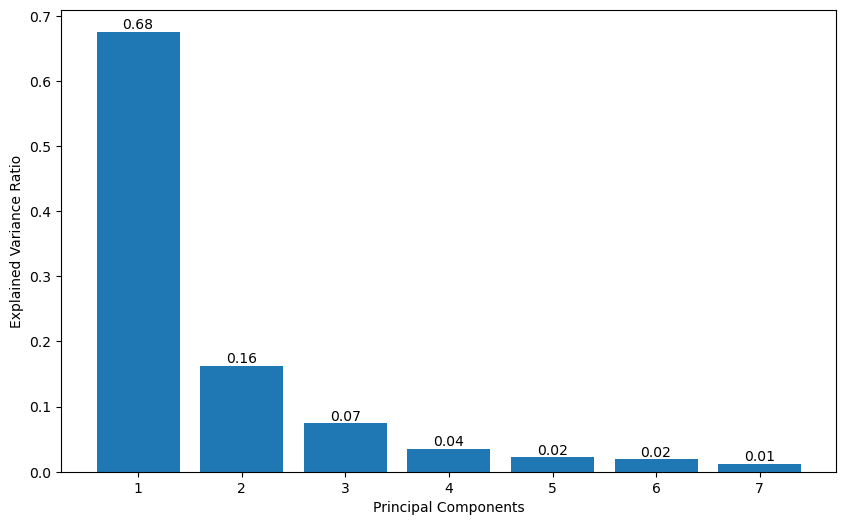

In [37]:
# Initialize a PCA object
pca = PCA(n_components=7)

# Standardize the data
scaler = StandardScaler()
scaled_ear_data = scaler.fit_transform(cleaned_ear_data)

# Fit the PCA model
pca.fit(scaled_ear_data)

# Transform the data
pca_data = pca.transform(scaled_ear_data)

# Visualize the explained variance ratio
plt.figure(figsize=(10, 6))
# plt.plot(range(1, 8), pca.explained_variance_ratio_, marker='o', linestyle='--')
# plt.title('Explained Variance Ratio')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Explained Variance Ratio')
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
for i, v in enumerate(pca.explained_variance_ratio_):
    plt.text(i + 1, v, f"{v:.2f}", ha='center', va='bottom')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

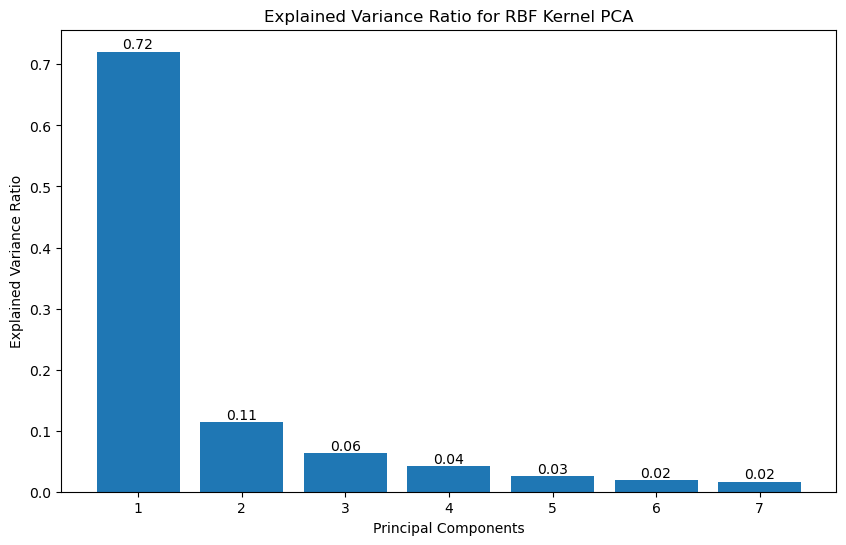

In [ ]:
# Initialize a 3-degree Kernel PCA object
poly_pca = KernelPCA(n_components=7, kernel='poly', degree=3)

# Fit the a 3-degree Kernel PCA object to the data
poly_pca_data = poly_pca.fit_transform(scaled_ear_data)

# Visualize the explained variance ratio
explained_variance = np.var(poly_pca_data, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
for i, v in enumerate(explained_variance_ratio):
    plt.text(i + 1, v, f"{v:.2f}", ha='center', va='bottom')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for RBF Kernel PCA')
plt.show()

# t-SNE

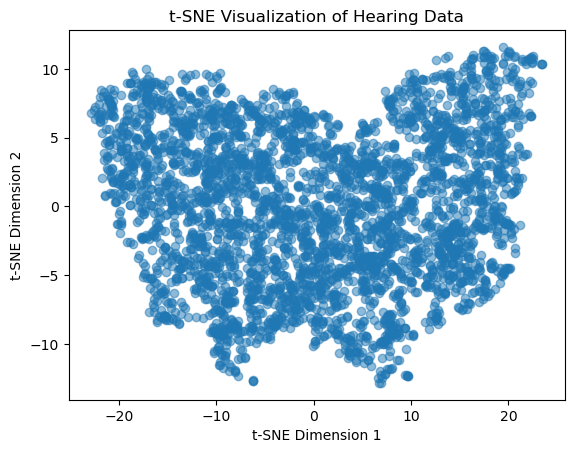

In [ ]:
# Fit t-SNE to the data
tsne = TSNE(n_components=2, random_state=42, n_jobs = -1)
reduced_data = tsne.fit_transform(cleaned_ear_data)

# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Hearing Data')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


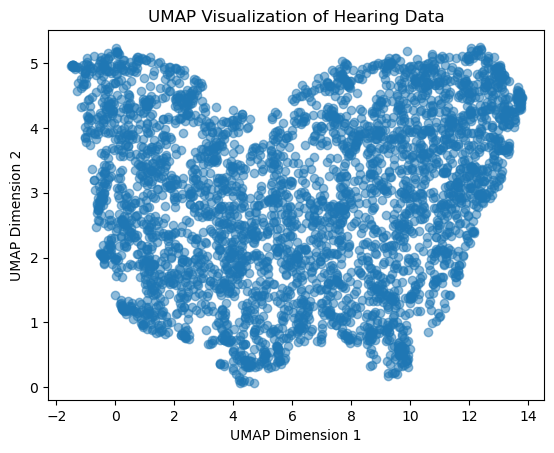

In [54]:
import umap

# Fit UMAP to the data
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
reduced_data = umap_reducer.fit_transform(cleaned_ear_data)

# Plot the reduced data
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Visualization of Hearing Data')
plt.show()